# Dataset
<hr>

In [2]:
import pandas as pd
import pandas as pd

df = pd.read_csv("archive/complaints.csv",sep=",")
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


# Data preprocessing

In [3]:
df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)
df.head()

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
unique=df["product"].unique()
unique

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

c:\Users\user01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


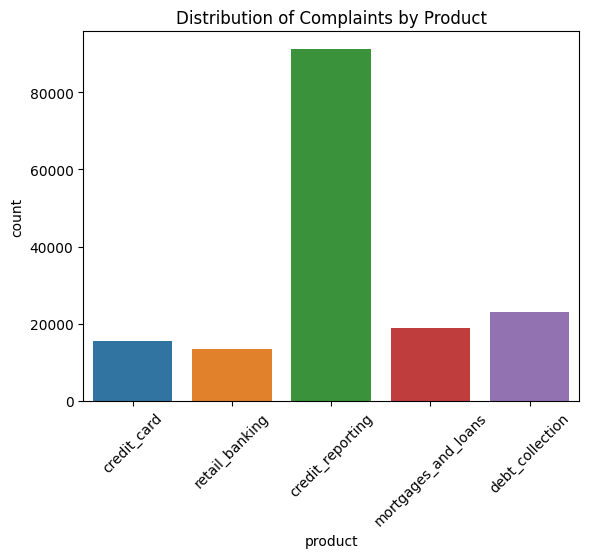

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='product', data=df)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



c:\Users\user01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


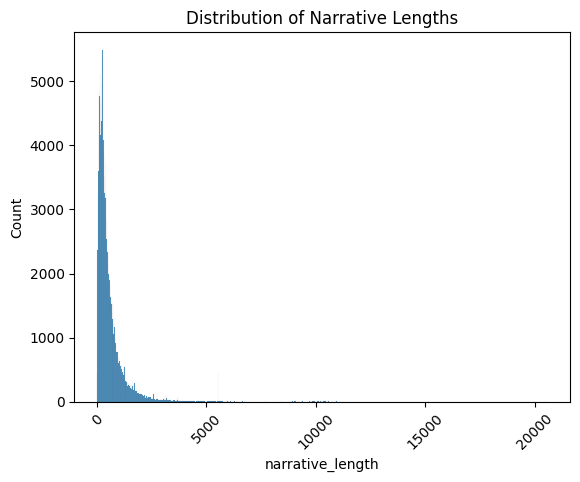

In [6]:
# Histogram of narrative lengths, handling NaN values
df['narrative_length'] = df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [7]:
df_encoded = pd.get_dummies(df['product'])
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Complaint_No,product,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,credit_card,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,credit_card,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,credit_reporting,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,credit_reporting,payment history missing credit report made mis...,851,False,True,False,False,False


In [8]:
df = df.drop('product', axis=1)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Complaint_No         162421 non-null  int64 
 1   narrative            162411 non-null  object
 2   narrative_length     162421 non-null  int64 
 3   credit_card          162421 non-null  bool  
 4   credit_reporting     162421 non-null  bool  
 5   debt_collection      162421 non-null  bool  
 6   mortgages_and_loans  162421 non-null  bool  
 7   retail_banking       162421 non-null  bool  
dtypes: bool(5), int64(2), object(1)
memory usage: 4.5+ MB


In [10]:
df.isnull().sum()

Complaint_No            0
narrative              10
narrative_length        0
credit_card             0
credit_reporting        0
debt_collection         0
mortgages_and_loans     0
retail_banking          0
dtype: int64

In [11]:
df=df.dropna()
df.isnull().sum()

Complaint_No           0
narrative              0
narrative_length       0
credit_card            0
credit_reporting       0
debt_collection        0
mortgages_and_loans    0
retail_banking         0
dtype: int64

In [12]:
df.duplicated().sum()

0

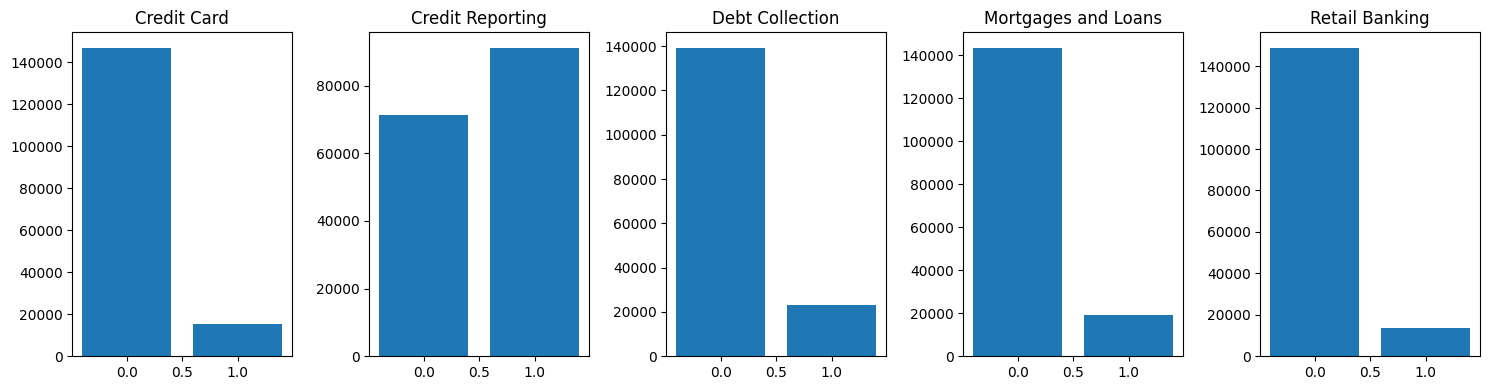

In [13]:
import matplotlib.pyplot as plt
# Count occurrences of each value in each column
counts_credit_card = df["credit_card"].value_counts()
counts_credit_reporting = df["credit_reporting"].value_counts()
counts_debt_collection = df["debt_collection"].value_counts()
counts_mortgages_and_loans = df["mortgages_and_loans"].value_counts()
counts_retail_banking = df["retail_banking"].value_counts()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

# Plot for 'credit_card' column
axes[0].bar(counts_credit_card.index, counts_credit_card.values)
axes[0].set_title('Credit Card')

# Plot for 'credit_reporting' column
axes[1].bar(counts_credit_reporting.index, counts_credit_reporting.values)
axes[1].set_title('Credit Reporting')

# Plot for 'debt_collection' column
axes[2].bar(counts_debt_collection.index, counts_debt_collection.values)
axes[2].set_title('Debt Collection')

# Plot for 'mortgages_and_loans' column
axes[3].bar(counts_mortgages_and_loans.index, counts_mortgages_and_loans.values)
axes[3].set_title('Mortgages and Loans')

# Plot for 'retail_banking' column
axes[4].bar(counts_retail_banking.index, counts_retail_banking.values)
axes[4].set_title('Retail Banking')

plt.tight_layout()
plt.show()

## Text preperation

## 1- lower case

In [14]:
df["narrative"]=df["narrative"].str.lower()
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


In [15]:
## 2- remove html tags

In [16]:
!pip install beautifulsoup4


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from bs4 import BeautifulSoup

## check if there is html tags

def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['narrative'].apply(has_html_tags)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


In [18]:
count_true = df['has_html_tags'].sum()
count_true

0

In [19]:
df = df.drop('has_html_tags', axis=1)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


## 3- remove emojies

In [20]:
!pip install emoji


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install regex


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install --upgrade emoji


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import regex
import pandas as pd

# Function to check if a string contains emojis using a Unicode character property
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['narrative'].apply(has_emoji)

has_emojis

0         False
1         False
2         False
3         False
4         False
          ...  
162416    False
162417    False
162418    False
162419    False
162420    False
Name: narrative, Length: 162411, dtype: bool

In [24]:
has_emojis.sum()

0

## 4- remove URLs

In [25]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["narrative"]=df["narrative"].apply(remove_url)

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


## 5- Remove puncatution

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
punc=string.punctuation

In [28]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


## 6- remove stop words

In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


## 7- Tokenize

In [31]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# Function to apply sentence and word tokenization
def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

df['Complaint_tokenized_text'] = df['narrative'].apply(tokenize_text)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Complaint_tokenized_text
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,"[[purchase, order, day, shipping, amount, rece..."
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,"[[forwarded, message, date, tue, subject, plea..."
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,"[[forwarded, message, cc, sent, friday, pdt, s..."
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,"[[payment, history, missing, credit, report, s..."
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,"[[payment, history, missing, credit, report, m..."


In [32]:
df["Complaint_tokenized_text"][0][0]

['purchase',
 'order',
 'day',
 'shipping',
 'amount',
 'receive',
 'product',
 'week',
 'sent',
 'followup',
 'email',
 'exact',
 'verbiage',
 'paid',
 'two',
 'day',
 'shipping',
 'received',
 'order',
 'company',
 'responded',
 'im',
 'sorry',
 'inform',
 'due',
 'unusually',
 'high',
 'order',
 'volume',
 'order',
 'shipped',
 'several',
 'week',
 'stock',
 'since',
 'early',
 'due',
 'high',
 'demand',
 'although',
 'continuing',
 'take',
 'order',
 'guaranteeing',
 'receive',
 'order',
 'place',
 'due',
 'time',
 'mask',
 'order',
 'exact',
 'shipping',
 'date',
 'right',
 'however',
 'guarantee',
 'ship',
 'soon',
 'soon',
 'delivers',
 'product',
 'u',
 'getting',
 'small',
 'shipment',
 'shipping',
 'first',
 'come',
 'first',
 'served',
 'basis',
 'appreciate',
 'patience',
 'fulfill',
 'order',
 'quickly',
 'recommend',
 'keeping',
 'order',
 'lose',
 'place',
 'line',
 'cancel',
 'distributor',
 'stock',
 'moment',
 'prefer',
 'cancel',
 'please',
 'note',
 'ask',
 'via',
 

In [34]:
df.to_csv('result/01_date_preprocessing_result.csv',encoding='utf8',index=False)